In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [ ]:
#importing dataset
data= pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
#data summary
data.describe()
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data= data[['v1','v2']]
data.columns =['labels','text']
data['labels']=data['labels'].map({'spam':1,'ham':0})


In [ ]:
#drop missing values of labels
data=data.dropna(subset=['labels'])
data.head()
data.shape

(5572, 2)

In [ ]:
#text data is converterd to numrical features using TF-IDF
tfidf= TfidfVectorizer(stop_words="english", max_features=2500)
x= tfidf.fit_transform(data['text']).toarray()
y= data['labels']

In [ ]:
feature_names =tfidf.get_feature_names_out()
x_data=pd.DataFrame(x,columns=feature_names)
x_data['labels']=y

In [ ]:
#calculate correlation between feature and target variables
correl_with_target = x_data.corr()['labels'].sort_values(ascending= False)

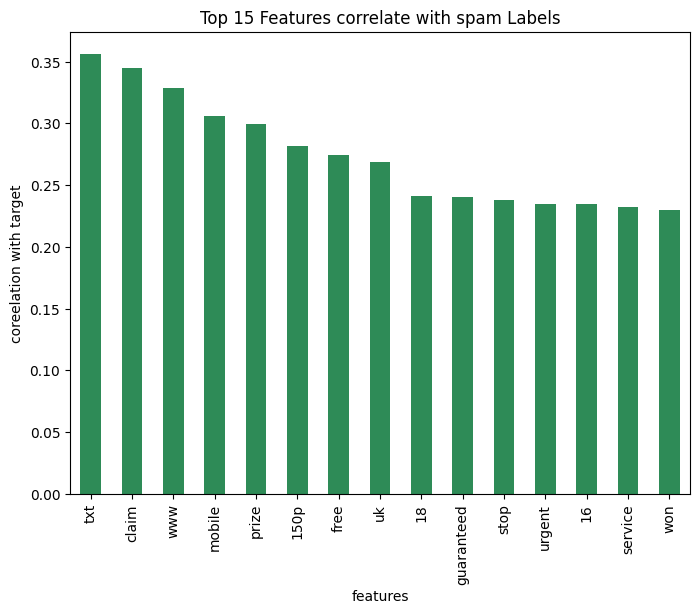

In [ ]:
#correlation visualization
plt.figure(figsize=(8,6))
correl_with_target.drop('labels').sort_values(ascending=False).head(15).plot(kind='bar',color='seagreen')
plt.title('Top 15 Features correlate with spam Labels')
plt.xlabel('features')
plt.ylabel('coreelation with target')
plt.show()

In [ ]:
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

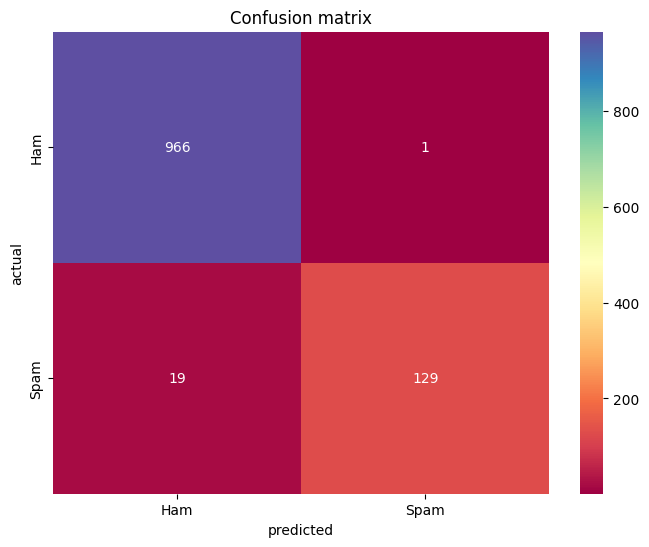

In [ ]:
#confusion Matrix Visualization
matrix=confusion_matrix(y_test,y_pre)
plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, fmt='d',cmap='Spectral',xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])
plt.title('Confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
#training Random Forest model
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pre= rf.predict(x_test)

In [ ]:
#evaluate the model of random forest
print('report of classification:',classification_report(y_test,y_pre))
print("Accuracy of RF classifier:",accuracy_score(y_test,y_pre))

report of classification:               precision    recall  f1-score   support

           0       0.98      1.00      0.99       967
           1       0.99      0.87      0.93       148

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy of RF classifier: 0.9820627802690582


In [ ]:
# @title To pedict a email if it is spam
def predict_spam(email_text):
  email_tfidf= tfidf.transform([email_text])
  predict= rf.predict(email_tfidf)
  return "Not spam." if predict[0] == 1 else "Spam!"



In [ ]:
# @title Testing the function
example_email ="Congratulations! You got a chance to visit abroad. Click here for more details. "
print(f"prediction for example email:{predict_spam(example_email)}")

prediction for example email:Spam!
